In [ ]:
# Data import
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pylab as pl
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAL.csv',encoding = "ISO-8859-1")

### **American Airlines Group Stock Data**
Initially, the dataset I picked was vast but had little valuable value to extract any vital information. So, I decided to use the  American Airlines Group Inc., an American publicly traded airline holding company. American Airlines is a respected organization but with little history in this dataset. It was constructed on December 9, 2013, by the parent company of American Airlines, AMR Corporation, and US Airways Group, the founding group of US Airways. The company employs the most extensive airline globally, as estimated by fleet size, passengers carried, and scheduled passenger kilometers flown.
Additionally, the corporation rated No. 70 in the Fortune 500 list of the most considerable United States enterprises based on its 2019 income. Nevertheless, the COVID-19 lost $2.2 billion in the first quarter of 2020 and received government aid. Consequently, American Airlines conveys being shrinking its passenger fleet.

In [ ]:
# Overall structure of info
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4071 non-null   object 
 1   Open       4071 non-null   float64
 2   High       4071 non-null   float64
 3   Low        4071 non-null   float64
 4   Close      4071 non-null   float64
 5   Adj Close  4071 non-null   float64
 6   Volume     4071 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 222.8+ KB


In [ ]:
# Overall structure of description
Dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4.071000e+03
mean,26.072933,26.548904,25.565903,26.045171,25.014746,1.296025e+07
std,16.197583,16.387556,15.998367,16.197287,15.538573,2.163853e+07
min,1.810000,2.030000,1.450000,1.760000,1.659225,1.385000e+05
25%,10.405000,10.725000,10.130000,10.320000,9.894393,4.460000e+06
50%,26.160000,26.660000,25.559999,26.180000,25.160000,7.057600e+06
75%,40.250000,40.910000,39.619999,40.264999,38.538807,1.138345e+07
max,62.700001,63.270000,62.000000,62.950001,59.345570,4.286171e+08


In [ ]:
# Overall structure of first five rows and columns of dataset
Dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-27,21.049999,21.400000,19.100000,19.299999,18.194910,961200
1,2005-09-28,19.299999,20.530001,19.200001,20.500000,19.326200,5747900
2,2005-09-29,20.400000,20.580000,20.100000,20.209999,19.052805,1078200
3,2005-09-30,20.260000,21.049999,20.180000,21.010000,19.807001,3123300
4,2005-10-03,20.900000,21.750000,20.900000,21.500000,20.268942,1057900


In [ ]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4071 non-null   object 
 1   Open       4071 non-null   float64
 2   High       4071 non-null   float64
 3   Low        4071 non-null   float64
 4   Close      4071 non-null   float64
 5   Adj Close  4071 non-null   float64
 6   Volume     4071 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 222.8+ KB


In [ ]:
#Create a new column called year
Dataframe['Year'] = pd.DatetimeIndex(Dataframe['Date']).year

In [ ]:
#Display results
Dataframe

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2005-09-27,21.049999,21.400000,19.100000,19.299999,18.194910,961200,2005
1,2005-09-28,19.299999,20.530001,19.200001,20.500000,19.326200,5747900,2005
2,2005-09-29,20.400000,20.580000,20.100000,20.209999,19.052805,1078200,2005
3,2005-09-30,20.260000,21.049999,20.180000,21.010000,19.807001,3123300,2005
4,2005-10-03,20.900000,21.750000,20.900000,21.500000,20.268942,1057900,2005
...,...,...,...,...,...,...,...,...
4066,2021-11-19,19.139999,19.440001,18.940001,19.280001,19.280001,31196100,2021
4067,2021-11-22,19.559999,19.760000,19.049999,19.629999,19.629999,33220600,2021
4068,2021-11-23,19.750000,20.139999,19.320000,19.469999,19.469999,30427300,2021
4069,2021-11-24,19.330000,19.549999,19.070000,19.459999,19.459999,21323300,2021


In [ ]:
#Calculate the the Opening average for each year 
AA_monthly_avg = Dataframe.groupby('Year').Close.mean()

In [ ]:
AA_monthly_avg

Year
2005    29.068507
2006    44.322390
2007    35.671952
2008     7.742134
2009     3.829643
2010     8.636667
2011     7.459841
2012    10.496160
2013    18.187936
2014    38.923651
2015    45.122103
2016    38.183849
2017    47.490717
2018    42.801952
2019    30.879326
2020    15.280395
2021    20.628596
Name: Close, dtype: float64

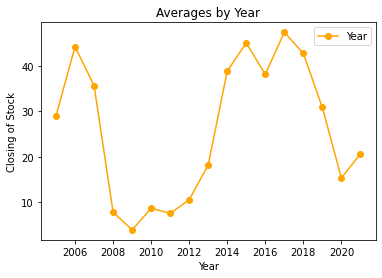

In [ ]:
plt.plot(AA_monthly_avg,"-o",color='#FFA500',label='Year')

#Plot the title to the chart
plt.title('Averages by Year')
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Closing of Stock')

#Adding a legend
plt.legend()
plt.show()

In [ ]:
def helper_fun(predictor,Dataframe):
  model = stats.linregress(Dataframe[predictor], Dataframe['Year'])
  print("r2",model.rvalue**2)
  print("p value",model.pvalue)
 
  plt.plot(Dataframe[predictor], Dataframe['Year'], 'o', label='original data')
  plt.plot(Dataframe[predictor], model.intercept + model.slope*Dataframe[predictor], 'r', label='fitted line')
  plt.legend()
  plt.title(f'regressing Year and {predictor}')
  plt.xlabel(predictor)
  plt.ylabel('Year')
  plt.show()

r2 0.04702461847937936
p value 1.5869100226518902e-44


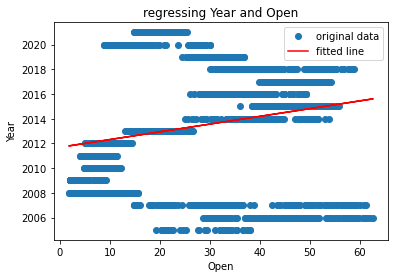

In [ ]:
helper_fun('Open',Dataframe)

r2 0.18107300039166951
p value 9.227843651633384e-179


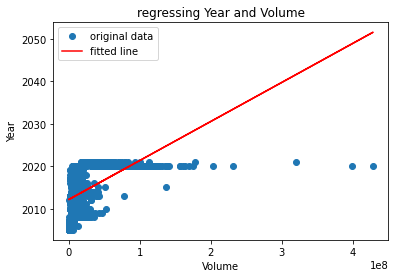

In [ ]:
helper_fun('Volume',Dataframe)

## **S&P Global, Inc.**
S&P Global, Inc. engages in the provision of transparent and independent ratings, benchmarks, analytics and data to the capital and commodity markets worldwide. It operates through the following segments: Ratings, Market Intelligence, Platts and Indices. The Ratings segment offers credit ratings, research, and analytics to investors, issuers, and other market participants. The Market Intelligence provides multi-asset-class data, research and analytical capabilities, which integrate cross-asset analytics and desktop services. The Platts segment includes information and benchmark prices for the commodity and energy markets. The Indices segment provides variety of valuation and index benchmarks for investment advisors, wealth managers and institutional investors. The company was founded by James H. McGraw and John A. Hill in 1917 and is headquartered in New York, NY.

-CNN Business

In [ ]:
SnP_Dataframe = pd.read_csv('/content/drive/MyDrive/data_sets/SnP.csv',encoding = "ISO-8859-1")

In [ ]:
SnP_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
SnP_Dataframe.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
SnP_Dataframe.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [ ]:
#Display only S&P Global Inc Stock
SPGI_Stock = SnP_Dataframe[SnP_Dataframe['Name'] == 'SPGI']

In [ ]:
#Create a new column called year
SPGI_Stock['Year'] = pd.DatetimeIndex(SPGI_Stock['date']).year

In [ ]:
SPGI_Stock

,date,open,high,low,close,volume,Name,Year
514519,2013-02-08,43.92,43.960,42.07,42.67,7888705,SPGI,2013
514520,2013-02-11,42.79,44.690,42.52,44.28,9586165,SPGI,2013
514521,2013-02-12,43.67,45.160,43.63,44.03,6457410,SPGI,2013
514522,2013-02-13,44.19,44.500,43.91,44.33,5095137,SPGI,2013
514523,2013-02-14,44.14,45.000,44.07,44.86,5003102,SPGI,2013
...,...,...,...,...,...,...,...,...
515773,2018-02-01,180.40,182.980,179.42,182.00,1102148,SPGI,2018
515774,2018-02-02,181.55,181.860,177.31,177.33,1118848,SPGI,2018
515775,2018-02-05,177.04,178.415,164.99,166.36,2508170,SPGI,2018
515776,2018-02-06,165.95,181.000,165.94,179.96,5582527,SPGI,2018


In [ ]:
#Calculate the the Opening average for each year 
SnP_monthly_avg = SPGI_Stock.groupby('Year').close.mean()

In [ ]:
SnP_monthly_avg

Year
2013     59.797699
2014     81.847937
2015     98.955198
2016    108.832857
2017    144.673765
2018    178.045769
Name: close, dtype: float64

In [ ]:
#AA_monthly_avg.drop(labels=[2005,2006,2007,2008,2009,2010,2011,2012,2019,2020,2021], axis=0)
AA_monthly_avg.drop([2005,2006,2007,2008,2009,2010,2011,2012,2019,2020,2021], axis=0, inplace = True)

In [ ]:
AA_monthly_avg.shape

(6,)

In [ ]:
SnP_monthly_avg

Year
2013     59.797699
2014     81.847937
2015     98.955198
2016    108.832857
2017    144.673765
2018    178.045769
Name: close, dtype: float64

In [ ]:
SnP_monthly_avg.shape

(6,)

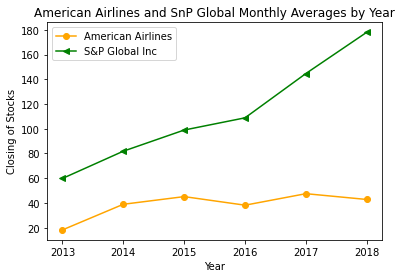

In [ ]:
plt.plot(AA_monthly_avg,"-o",color='#FFA500',label='American Airlines')
plt.plot(SnP_monthly_avg,"-<",color='#008000',label='S&P Global Inc')

#Plot the title to the chart
plt.title('American Airlines and SnP Global Monthly Averages by Year')
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Closing of Stocks')

#Adding a legend
plt.legend()
plt.show()

In [ ]:
#calculate the correlation between the two arrays
np.corrcoef(AA_monthly_avg, SnP_monthly_avg)[0,1]

0.6792952097677315